# Assignment 3: A Baby Project
# Sephora Skincare Reviews Data Analysis
## 1. Opens up the product_info datafile.
### 1.1 Load the product_info Data

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('product_info.csv')


### 1.2 Overview of Data Set 

### Dataset Name: Sephora Skincare Reviews
**Source**: Kaggle

**Content**:
- Customer reviews for skincare and makeup products sold at Sephora
- Includes product names and ratings
- Pricing details (original price, sale price)
- Additional attributes such as ingredients, variation types, and sizes
- Availability indicators (limited edition, online only, out of stock)
- Consumer engagement metrics (loves count, total reviews)

**Key Statistical Insights**
- **No. of columns**: 27
- **No. of rows**: 8,494
- **Unique Products**: 8,415
- **Unique Brands**: 304
- **Brand with Most Products**: SEPHORA COLLECTION (Number of Products: 352)

Notable **Missing Values** in the dataset include:
- **variation_desc**: 7244 missing values (85.28%)
- **value_price_usd**: 8043 missing values (94.69%)
- **sale_price_usd**: 8224 missing values (96.82%)
- **child_max_price**: 5740 missing values (67.58%)
- **child_min_price**: 5740 missing values (67.58%)
 


### 1.2.1 Summary Statistics

In [10]:
# 1.2 Data Overview
summary_statistics = data.describe(include='all')
summary_statistics

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
count,8494,8494,8494.000000,8494,8.494000e+03,8216.000000,8216.000000,6863,7050,6896,...,8494.000000,8494.000000,8494.000000,6287,8494,8486,7504,8494.000000,2754.000000,2754.000000
unique,8494,8415,NaN,304,NaN,NaN,NaN,2055,7,2729,...,NaN,NaN,NaN,4417,9,41,118,NaN,NaN,NaN
top,P505461,Discovery Set,NaN,SEPHORA COLLECTION,NaN,NaN,NaN,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,NaN,NaN,NaN,"['Layerable Scent', 'Floral Scent']",Skincare,Women,Perfume,NaN,NaN,NaN
freq,1,3,NaN,352,NaN,NaN,NaN,500,4043,374,...,NaN,NaN,NaN,64,2420,875,568,NaN,NaN,NaN
mean,NaN,NaN,5422.440546,NaN,2.917957e+04,4.194513,448.545521,NaN,NaN,NaN,...,0.219096,0.073699,0.279374,NaN,NaN,NaN,NaN,1.631622,53.792023,39.665802
std,NaN,NaN,1709.595957,NaN,6.609212e+04,0.516694,1101.982529,NaN,NaN,NaN,...,0.413658,0.261296,0.448718,NaN,NaN,NaN,NaN,5.379470,58.765894,38.685720
min,NaN,NaN,1063.000000,NaN,0.000000e+00,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,3.000000
25%,NaN,NaN,5333.000000,NaN,3.758000e+03,3.981725,26.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,22.000000,19.000000
50%,NaN,NaN,6157.500000,NaN,9.880000e+03,4.289350,122.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,32.000000,28.000000
75%,NaN,NaN,6328.000000,NaN,2.684125e+04,4.530525,418.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,59.000000,42.000000


### 1.2.2 Missing Data Summary

In [11]:
# Calculate the number of missing values for each column
missing_values_count = data.isnull().sum()

# Get the data types of each column
data_types = data.dtypes

# Combine all the required details into a single DataFrame
missing_data_summary = pd.DataFrame({
    'Column': data.columns,
    'Dtype': data_types,
    'Missing Count': missing_values_count,
    'Missing Percentage (%)': (missing_values_count / data.shape[0]) * 100
})

# Keep the original order of columns in the dataset
missing_data_summary = missing_data_summary.reset_index(drop=True)

# Display the full summary
print("Missing Data Summary")
print(missing_data_summary)


Missing Data Summary
                Column    Dtype  Missing Count  Missing Percentage (%)
0           product_id   object              0                0.000000
1         product_name   object              0                0.000000
2             brand_id    int64              0                0.000000
3           brand_name   object              0                0.000000
4          loves_count    int64              0                0.000000
5               rating  float64            278                3.272899
6              reviews  float64            278                3.272899
7                 size   object           1631               19.201789
8       variation_type   object           1444               17.000235
9      variation_value   object           1598               18.813280
10      variation_desc   object           7244               85.283730
11         ingredients   object            945               11.125500
12           price_usd  float64              0          

## 2. Exploratory Data Analysis (EDA) - Summaries

### 2.1 Average Rating for Each Product Category
- **Objective**: Calculate average ratings for products by brand.
- **Insight**: Identifies top-performing brands based on customer ratings.

In [32]:
# Pivot table for average rating by brand name
avg_rating_by_brand = df.groupby('brand_name')['rating'].mean().reset_index()

# Sort the results from high to low ratings
avg_rating_by_brand = avg_rating_by_brand.sort_values(by='rating', ascending=False)

# Print the title and the DataFrame
print("Average Rating by Brand Name:\n")
print(avg_rating_by_brand)

Average Rating by Brand Name:

           brand_name    rating
78        Erno Laszlo  5.000000
10              Aquis  4.904800
158   MACRENE actives  4.889420
161              MARA  4.823860
32             CANOPY  4.813733
..                ...       ...
47   Christophe Robin  3.154767
101    Good Dye Young  3.062050
194           Overose  2.848450
253         The Maker       NaN
299        philosophy       NaN

[304 rows x 2 columns]


### 2.2 List of Products with Ratings Above 4.5 and Minimum Lovescount = 200000
- **Objective**: Filter products with high ratings and significant popularity.
- **Insight**: Highlights successful, high-quality products in the market.

In [33]:
# Define criteria
rating_threshold = 4.5
min_loves_count = 200000

# Filter products based on criteria
filtered_products = df[
    (df['rating'] > rating_threshold) &
    (df['loves_count'] >= min_loves_count)
].copy()  # Create a copy to avoid SettingWithCopyWarning

# Sort by rating
filtered_products = filtered_products.sort_values(by='rating', ascending=False)

print("List of Products with Ratings Above 4.5 and Minimum Lovescount = 200000\n")

# Display relevant columns
print(filtered_products[['brand_name', 'product_name', 'rating', 'loves_count']])

List of Products with Ratings Above 4.5 and Minimum Lovescount = 200000

                       brand_name  \
5922                   PATRICK TA   
251       Anastasia Beverly Hills   
256       Anastasia Beverly Hills   
252       Anastasia Beverly Hills   
7983                  Urban Decay   
248       Anastasia Beverly Hills   
5250                         NARS   
7341                        tarte   
7986                  Urban Decay   
8430           Yves Saint Laurent   
2523      Fenty Beauty by Rihanna   
7847                    Too Faced   
987                         Buxom   
2527      Fenty Beauty by Rihanna   
5254                         NARS   
988                         Buxom   
5060                  Moroccanoil   
7340                        tarte   
8185                  Viktor&Rolf   
7982                  Urban Decay   
7977                  Urban Decay   
6244  Rare Beauty by Selena Gomez   
7652                 The Ordinary   
1155                       CHANEL   
58

### 2.3 Average Price by Category and New Products
- **Objective**: Analyze average prices by product category and new status.
- **Insight**: Reveals pricing trends, aiding marketing and inventory decisions.

In [34]:
# Create a pivot table to calculate average price by primary category and new status
pivot_avg_price = df.pivot_table(values='price_usd', index='primary_category', columns='new', aggfunc='mean', fill_value=0)

# Rename columns for clarity
pivot_avg_price.columns = ['Not New', 'New']

# Resetting index to make the table more user-friendly
pivot_avg_price.reset_index(inplace=True)

# Print the title
print("Average Price by Primary Category and New Status\n")

# Display the pivot table
print(pivot_avg_price)

Average Price by Primary Category and New Status

  primary_category    Not New        New
0      Bath & Body  43.229223  30.625000
1        Fragrance  86.562077  96.300971
2            Gifts  50.000000   0.000000
3             Hair  42.074373  51.730370
4           Makeup  32.879357  30.896552
5              Men  33.200000   0.000000
6        Mini Size  21.066540  24.880000
7         Skincare  59.845359  68.167423
8  Tools & Brushes  32.559000  16.000000


## 3. Exploratory Data Analysis (EDA) - Charts

### 3.1 Histogram: Distribution of Customer Ratings for Skincare Products
- **Objective**: Visualize customer rating distribution for skincare products.
- **Insight**: Illustrates overall customer satisfaction levels across all products, providing a comprehensive view of rating trends 

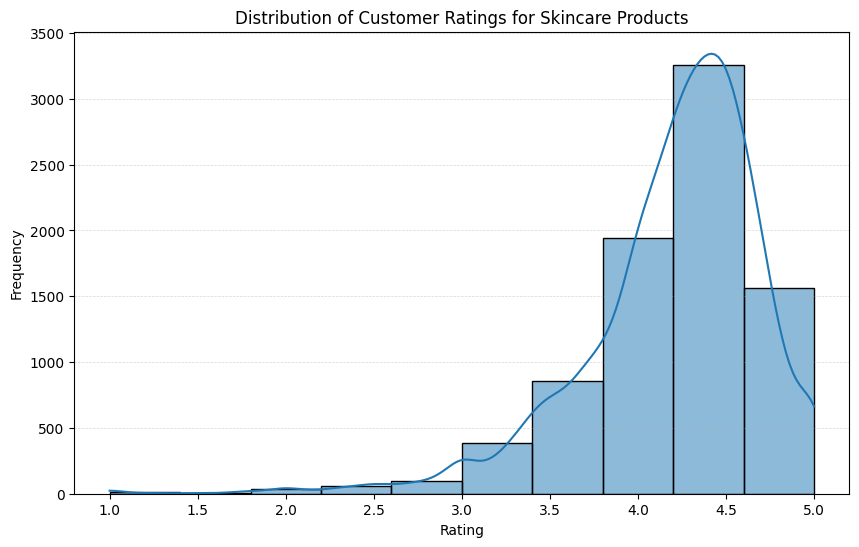

In [41]:
# Calculate average ratings by brand
top_brands = df.groupby('brand_id')['rating'].mean().reset_index()

# Sort by average rating and get the top 10
top_brands = top_brands.sort_values(by='rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)  # Ensure 'df' is used if 'data' is not defined
plt.title('Distribution of Customer Ratings for Skincare Products')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)  # Dashed line, less bold
plt.show()

### 3.2 Bar Chart: Average Loves Count by Primary Category
- **Objective**: Compare average loves counts across product categories.
- **Insight**: Indicates customer loyalty and helps focus marketing efforts.

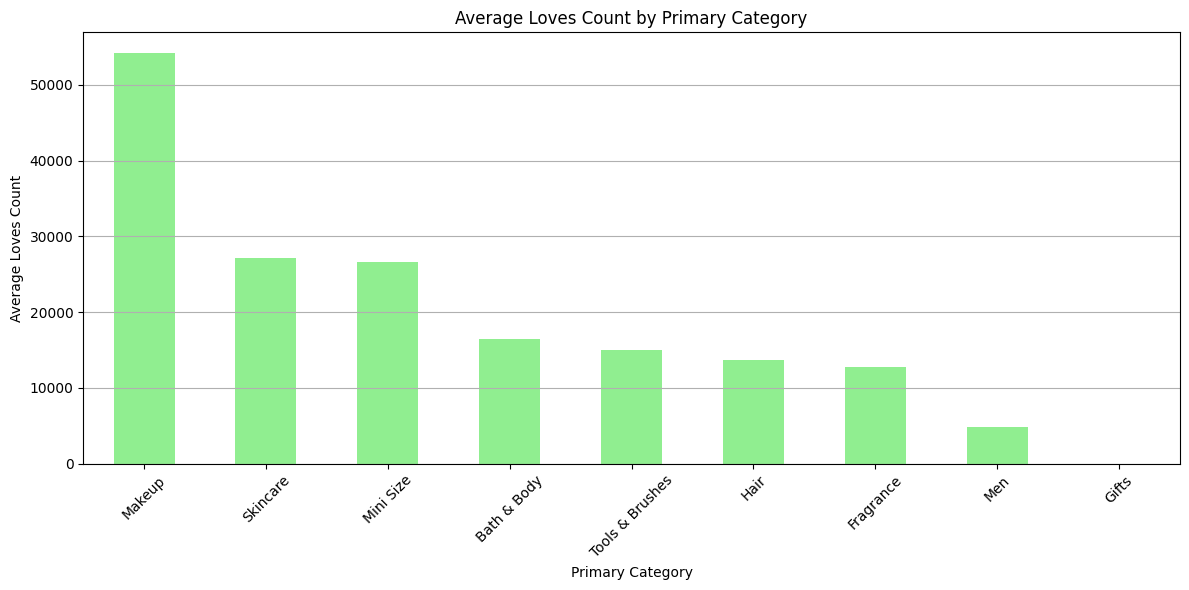

In [39]:
# 2.2 Calculate average loves count by primary category
average_loves_count_by_category = df.groupby('primary_category')['loves_count'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
average_loves_count_by_category.plot(kind='bar', color='lightgreen')
plt.title('Average Loves Count by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Loves Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

### 3.3 Pie Chart: Proportion of Sephora Exclusive Products
- **Objective**: Visualize the share of exclusive vs. non-exclusive products.
- **Insight**: Informs inventory and marketing strategies regarding exclusivity.

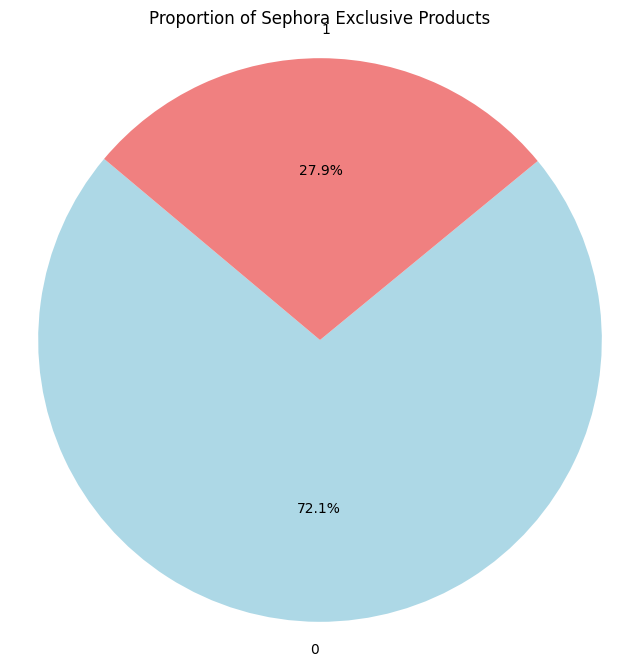

In [38]:
# Count the number of exclusive and non-exclusive products
sephora_exclusive_count = df['sephora_exclusive'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sephora_exclusive_count, labels=sephora_exclusive_count.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Sephora Exclusive Products')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

### 3.4 Sephora Skincare Reviews Dataset Analysis Summary
The **Sephora Skincare Reviews** dataset offers valuable insights into skincare products, emphasizing customer ratings and preferences. 
Key analyses include:

- **Average Ratings**: Identifies top-performing brands based on customer feedback.
- **High-Quality Products**: Highlights products with ratings above 4.5 and a minimum loves count, indicating significant popularity and market success.
- **Pricing Trends**: Analyzes average prices by product category, aiding marketing strategies and inventory management.
- **Customer Satisfaction**: Visualizes the distribution of customer ratings, reflecting overall satisfaction levels with various products.
- **Customer Loyalty**: Compares average loves counts across categories, indicating levels of brand loyalty among consumers.
- **Product Exclusivity**: Shows the proportion of exclusive versus non-exclusive products, informing inventory and targeted marketing initiatives.
